In [1]:
import pandas as pd 
import numpy as np
import numpy.linalg as la

In [2]:
df = pd.read_csv('breast_cancer.csv',usecols=['mean radius','mean texture','mean perimeter','target'])
df

,mean radius,mean texture,mean perimeter,target
0,17.99,10.38,122.80,0
1,20.57,17.77,132.90,0
2,19.69,21.25,130.00,0
3,11.42,20.38,77.58,0
4,20.29,14.34,135.10,0
...,...,...,...,...
564,21.56,22.39,142.00,0
565,20.13,28.25,131.20,0
566,16.60,28.08,108.30,0
567,20.60,29.33,140.10,0


In [3]:
df.isna().sum()

mean radius       0
mean texture      0
mean perimeter    0
target            0
dtype: int64

In [4]:
import plotly.express as px 
df['target'] = df['target'].astype(str)

fig = px.scatter_3d(df,
                    x= 'mean radius',
                    y='mean texture',
                    z='mean perimeter',
                    color='target')
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

#### 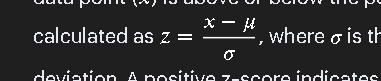 
##### µ = mean of column and o = means sigma 

In [5]:
#apply standerdevation 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:3] = scaler.fit_transform(df.drop('target',axis=1))
df


,mean radius,mean texture,mean perimeter,target
0,1.097064,-2.073335,1.269934,0
1,1.829821,-0.353632,1.685955,0
2,1.579888,0.456187,1.566503,0
3,-0.768909,0.253732,-0.592687,0
4,1.750297,-1.151816,1.776573,0
...,...,...,...,...
564,2.110995,0.721473,2.060786,0
565,1.704854,2.085134,1.615931,0
566,0.702284,2.045574,0.672676,0
567,1.838341,2.336457,1.982524,0


In [6]:
f1 = df['mean radius']
f2 = df['mean texture']
f3 = df['mean perimeter']

In [7]:
covarince_matrix = np.cov([f1,f2,f3])
covarince_matrix

array([[1.00176056, 0.32435193, 0.99961207],
       [0.32435193, 1.00176056, 0.33011322],
       [0.99961207, 0.33011322, 1.00176056]])

In [19]:
egin_value , eigen_vectors = la.eig(covarince_matrix)

In [10]:
egin_value

array([2.18271986e+00, 2.12989937e-03, 8.20431928e-01])

In [ ]:
eigen_vectors

array([[-0.65788002, -0.70635192,  0.26126777],
       [-0.36485404, -0.00456444, -0.93105354],
       [-0.658844  ,  0.70784612,  0.2547125 ]])

In [17]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'target'], dtype='object')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


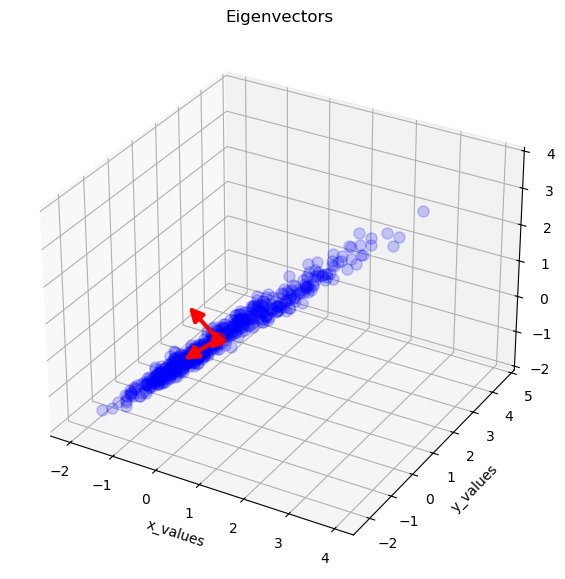

In [20]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()
        _, _, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        return zs.min()


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['mean radius'], df['mean texture'], df['mean perimeter'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['mean radius'].mean()], [df['mean texture'].mean()], [df['mean perimeter'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['mean radius'].mean(), v[0]], [df['mean texture'].mean(), v[1]], [df['mean perimeter'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [21]:
pc = eigen_vectors[0:2]
pc

array([[-0.65788002, -0.70635192,  0.26126777],
       [-0.36485404, -0.00456444, -0.93105354]])

In [22]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,1.074560,-1.573181,0
1,-0.513528,-2.235717,0
2,-0.952329,-2.037009,0
3,0.171776,0.831205,0
4,0.126264,-2.287430,0


In [23]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [24]:
dh = {}
for i in range(1,20):
    dh[i] = i

In [25]:
dh

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19}